In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.exceptions import FitFailedWarning
import warnings


In [2]:
df = pd.read_csv("../../data/train/train.csv")

In [3]:
df.head(5)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,...,version_Remix,version_type_encoded,decade,decade_range,energy_danceability_valence,acoustic_intensity,popularity_energy_ratio,valence_energy_dif,decade_label,popularity_normalized
0,1xUJ1mdLAysxNBtO9w3J2g,Stompin At The Savoy,['Benny Goodman'],195533,1/1/90,1990,0.836,0.5250,0.222,0.079900,...,0,1,1990,90s-00s,0.075175,-9.250340,225.215080,0.4230,2,0.370632
1,62fX8EW16l8St2yL8rMer9,In My Room - Remastered,['The Beach Boys'],134133,9/16/63,1963,0.184,0.3410,0.416,0.000063,...,0,2,1960,50s-60s,0.070786,-1.761616,129.804572,0.0830,0,2.548527
2,0vTrXo9zLWib36Us8BQ4sN,State Of Independence - Single Version,['Jon & Vangelis'],262107,1/1/84,1984,0.148,0.7520,0.652,0.045500,...,0,1,1980,70s-80s,0.428526,-1.941760,59.815034,0.2220,1,0.272035
3,23IoCDFHoz1uM5XELOSg1U,Chandni Raaten Pyar Ki Baaten,"['Hemant Kumar', 'Lata Mangeshkar']",208973,12/1/52,1952,0.990,0.3110,0.253,0.000156,...,0,1,1950,50s-60s,0.033204,-11.814660,43.476542,0.1690,0,-0.478555
4,5ZrtPphrWFzzamKn3jSnv9,"Adagio for Strings, Op. 11","['Samuel Barber', 'Philadelphia Orchestra', 'E...",463347,1955,1955,0.910,0.0626,0.129,0.780000,...,0,1,1950,50s-60s,0.000281,-19.532240,302.302147,-0.0942,0,1.492568


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95958 entries, 0 to 95957
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           95958 non-null  object 
 1   name                         95958 non-null  object 
 2   artists                      95958 non-null  object 
 3   duration_ms                  95958 non-null  int64  
 4   release_date                 95958 non-null  object 
 5   year                         95958 non-null  int64  
 6   acousticness                 95958 non-null  float64
 7   danceability                 95958 non-null  float64
 8   energy                       95958 non-null  float64
 9   instrumentalness             95958 non-null  float64
 10  liveness                     95958 non-null  float64
 11  loudness                     95958 non-null  float64
 12  speechiness                  95958 non-null  float64
 13  tempo           

In [5]:
df.columns

Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit', 'artists_frequency', 'version_type',
       'base_name', 'version_Live', 'version_Original', 'version_Remaster',
       'version_Remix', 'version_type_encoded', 'decade', 'decade_range',
       'energy_danceability_valence', 'acoustic_intensity',
       'popularity_energy_ratio', 'valence_energy_dif', 'decade_label',
       'popularity_normalized'],
      dtype='object')

### KNN

In [7]:
X = df[['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'version_Live', 'version_Original', 'version_Remaster',
       'version_Remix', 'energy_danceability_valence', 'acoustic_intensity',
       'popularity_energy_ratio', 'valence_energy_dif', 'popularity_normalized']]
y = df['decade_label']

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(76766, 21)
(19192, 21)
(76766,)
(19192,)


In [12]:
model_1 = KNeighborsClassifier()
model_1.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred = model_1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.6407357232180075
Precision: 0.6385304483998556
Recall: 0.640030143672984
F1-Score: 0.6348654305237003


In [21]:
param_grid = {'n_neighbors': np.arange(1,30)}

grid_search = GridSearchCV(KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='accuracy')

In [22]:
best_k = grid_search.best_params_['n_neighbors']
print(f"El mejor valor de K es: {best_k}")

El mejor valor de K es: 24


In [23]:
knn_best = grid_search.best_estimator_

In [24]:
y_pred_best = knn_best.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='macro')
recall_best = recall_score(y_test, y_pred_best, average='macro')
f1_best = f1_score(y_test, y_pred_best, average='macro')

print("\nResultados con el mejor K:")
print(f"Accuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1-Score: {f1_best}")


Resultados con el mejor K:
Accuracy: 0.6651208837015423
Precision: 0.6628470533073517
Recall: 0.6644043293774679
F1-Score: 0.6594212432698375


### Preprocesado PCA

Variables seleccionadas con feature importance en XGBoost. Se excluye también energy porque se había comprobado multicolinealidad con variables como loudness y acousticness y este es un modelo sensible a la relación entre variables predictoras.

In [101]:
X_2 = df[['duration_ms', 'acousticness', 'danceability', 'instrumentalness',
          'loudness', 'speechiness', 'valence', 'tempo', 'popularity_normalized']]
y_2 = df['decade_label']

In [102]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_2)

In [103]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

In [104]:
print("Varianza explicada acumulada:", sum(pca.explained_variance_ratio_))

Varianza explicada acumulada: 1.0000000000000002


In [105]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [106]:
model_2 = KNeighborsClassifier(n_neighbors=10)

model_2.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=10)

In [107]:
y_pred_pca = model_2.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='macro')
recall_pca = recall_score(y_test, y_pred_pca, average='macro')
f1_pca = f1_score(y_test, y_pred_pca, average='macro')

print(f"Accuracy: {accuracy_pca}")
print(f"Precision: {precision_pca}")
print(f"Recall: {recall_pca}")
print(f"F1-Score: {f1_pca}")

Accuracy: 0.6617861609003751
Precision: 0.6608510424588676
Recall: 0.6611420223152229
F1-Score: 0.6565466482283098


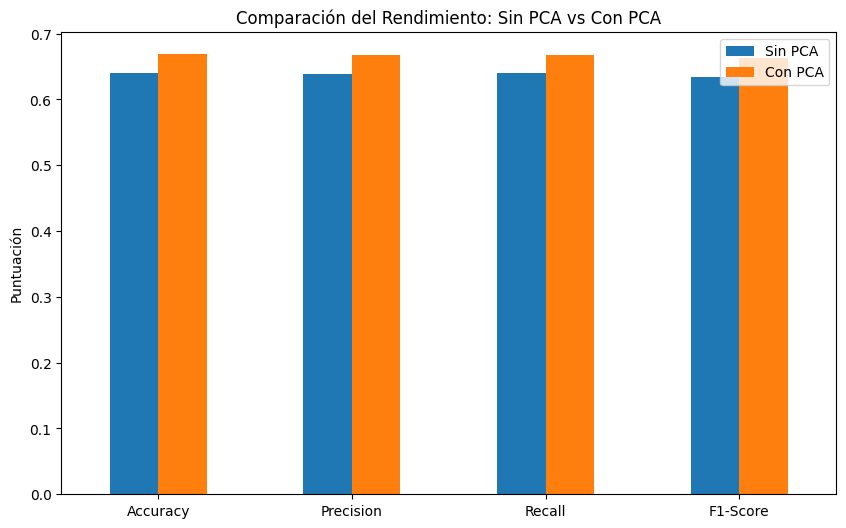

In [ ]:
results = {
    "Sin PCA": [accuracy, precision, recall, f1],
    "Con PCA": [accuracy_pca, precision_pca, recall_pca, f1_pca]}

results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score"])
results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Comparación del Rendimiento: Sin PCA vs Con PCA")
plt.ylabel("Puntuación")
plt.xticks(rotation=0)
plt.show()

### Hiperparametrización

In [77]:
X_3 = df[['duration_ms', 'acousticness', 'danceability', 'instrumentalness',
          'loudness', 'speechiness', 'valence', 'tempo', 'popularity_normalized']]
y_3 = df['decade_label']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.2, random_state=42)


In [79]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),               
    ('kmeans', KMeans(n_clusters=5, random_state=42)),
    ('knn', KNeighborsClassifier())])

In [80]:
param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'pca__n_components': [5, 10, 15, 20],
    'kmeans': [KMeans(n_clusters=3, random_state=42), KMeans(n_clusters=5, random_state=42)],
    'knn__n_neighbors': [5, 10, 15, 20],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']}

In [81]:
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1)

In [82]:
warnings.filterwarnings("ignore")

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('kmeans',
                                        KMeans(n_clusters=5, random_state=42)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kmeans': [KMeans(n_clusters=3, random_state=42),
                                    KMeans(n_clusters=5, random_state=42)],
                         'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [5, 10, 15, 20],
                         'knn__weights': ['uniform', 'distance'],
                         'pca__n_components': [5, 10, 15, 20],
                         'scaler': [StandardScaler(), MinMaxScaler()]},
             scoring='accuracy')

In [83]:
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'kmeans': KMeans(n_clusters=5, random_state=42), 'knn__metric': 'euclidean', 'knn__n_neighbors': 20, 'knn__weights': 'distance', 'pca__n_components': 5, 'scaler': StandardScaler()}


In [84]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy_3 = accuracy_score(y_test, y_pred)
precision_3 = precision_score(y_test, y_pred, average='macro')
recall_3 = recall_score(y_test, y_pred, average='macro')
f1_3 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy_3}")
print(f"Precision: {precision_3}")
print(f"Recall: {recall_3}")
print(f"F1-Score: {f1_3}")

Accuracy: 0.5686744476865361
Precision: 0.5631426627978245
Recall: 0.5679720232865194
F1-Score: 0.562914912129802
